# Image Classification using Convolutional Neural Network

In [ ]:
# pip install tensorflow

In [2]:
# pip install openCV-python

In [1]:
# Title: Using Convolution Neural Network for Image Classification 
# Author: Niklas Lang
# Date: December 04, 2021
# Code version: 1.0
# Availability: https://towardsdatascience.com/using-convolutional-neural-network-for-image-classification-5997bfd0ede4

In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
import tensorflow as tf

from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam_v2
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2
import random 
from numpy import * 
import keras

In [4]:
# path = "./imageset/train"
path = "/content/drive/MyDrive/data/imageset/train"  #Use the path for google drive

#Class names were assigned to each folder to better identify each class.
Class_names = ["FISH","DOG","CHAINSAW","TRUCK", "TRUMPET","RADIO","MONUMENT","GOLFBALL","PARACHUTE","FUELPUMP"]
IMG_SIZE=224

In [5]:
training = []
def createTrainingData():
  for category in Class_names:
    path = os.path.join(path_test, category)
    class_num = Class_names.index(category)

    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
      training.append([new_array,class_num])
   
createTrainingData() #Reads images from each class, converts them to arrays and assign class labels

In [6]:
X = []
y = []
for features, label in training:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [7]:
random.shuffle(training)

In [8]:
X = X.astype('float32')
X /= 255

from keras.utils import np_utils
Y = np_utils.to_categorical(y, 10)
print(Y[100])
print(shape(Y))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9469, 10)


## Train-Test Splitting
- validation folder kept for model evaluation

In [9]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

## Baseline Model

In [36]:
#prepare the model with different layers
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32,(3,3), padding='valid', activation= tf.nn.relu,
                       kernel_initializer= 'he_normal',input_shape= (224,224,3)),
tf.keras.layers.MaxPooling2D((2,2), strides = 2),
tf.keras.layers.Conv2D(32,(3,3), padding = 'valid', activation = tf.nn.relu),
tf.keras.layers.MaxPooling2D((2,2), strides = 2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation= tf.nn.relu),
tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

#compile the model
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(np.array(X_train), np.array(y_train),batch_size = 32 ,epochs = 5, verbose = 1,
                    validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/5
237/237 [==============================] - 164s 659ms/step - loss: 2.3049 - accuracy: 0.3374 - val_loss: 1.5169 - val_accuracy: 0.5090
Epoch 2/5
237/237 [==============================] - 170s 716ms/step - loss: 1.1439 - accuracy: 0.6283 - val_loss: 1.3310 - val_accuracy: 0.5913
Epoch 3/5
237/237 [==============================] - 175s 738ms/step - loss: 0.4335 - accuracy: 0.8653 - val_loss: 1.5219 - val_accuracy: 0.5971
Epoch 4/5
237/237 [==============================] - 153s 644ms/step - loss: 0.1204 - accuracy: 0.9678 - val_loss: 1.9420 - val_accuracy: 0.5866
Epoch 5/5
237/237 [==============================] - 676s 3s/step - loss: 0.0451 - accuracy: 0.9904 - val_loss: 2.1232 - val_accuracy: 0.5834


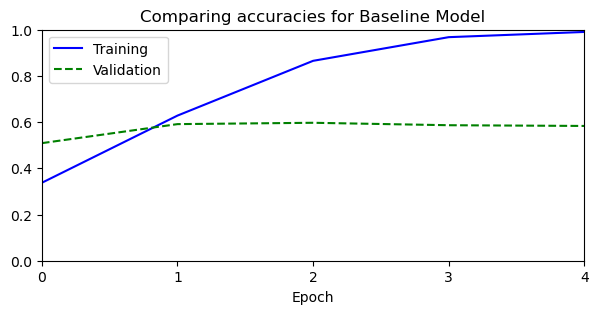

In [45]:
plt.figure(figsize=(7, 3))
plt.plot(history.history['accuracy'], color='blue', label='Training')
plt.plot(history.history['val_accuracy'],linestyle = '--',color='green', label='Validation')

plt.title('Comparing accuracies for Baseline Model')
plt.xlabel('Epoch')
plt.xticks(range(0,5))
plt.xlim([0,4])
plt.ylim([0,1])
plt.legend()
plt.show()

In [20]:
#Tried Grid Search method to find optimal paramters, unsuccessful attempt

# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier

# model1 = KerasClassifier(build_fn=classification_model('Adam'), verbose=0)

# param_grid = {'batch_size': [32,64,128],
#               'epochs': [2,5,7]}
# grid = GridSearchCV(estimator=model1, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

## Hyperparameter tuning for the best optimizer

## Model1: Adam 

In [50]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='valid', activation= tf.nn.relu,
                           kernel_initializer= 'he_normal',input_shape= (224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Conv2D(32,(3,3), padding = 'valid', activation = tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
    ])
model1.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist1 = model1.fit(np.array(X_train), np.array(y_train),batch_size = 32 ,epochs = 5, verbose = 1,
                        validation_data=(np.array(X_test), np.array(y_test)))

## Model2: RMSProp 

In [19]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='valid', activation= tf.nn.relu,
                           kernel_initializer= 'he_normal',input_shape= (224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Conv2D(32,(3,3), padding = 'valid', activation = tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
    ])
model2.compile(optimizer= 'RMSProp', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
hist2 = model2.fit(np.array(X_train), np.array(y_train),batch_size = 32 ,epochs = 5, verbose = 1,
                        validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/5
237/237 [==============================] - 723s 3s/step - loss: 1.5454 - accuracy: 0.5019 - val_loss: 2.2720 - val_accuracy: 0.3083
Epoch 2/5
237/237 [==============================] - 186s 787ms/step - loss: 0.7387 - accuracy: 0.7678 - val_loss: 1.3755 - val_accuracy: 0.5528
Epoch 3/5
237/237 [==============================] - 211s 892ms/step - loss: 0.2515 - accuracy: 0.9307 - val_loss: 1.3111 - val_accuracy: 0.6235
Epoch 4/5
237/237 [==============================] - 206s 868ms/step - loss: 0.1001 - accuracy: 0.9727 - val_loss: 1.4070 - val_accuracy: 0.6283
Epoch 5/5
237/237 [==============================] - 246s 1s/step - loss: 0.0529 - accuracy: 0.9877 - val_loss: 1.7609 - val_accuracy: 0.6019


### Model 3: Stochastic Gradient Descent (SGD)

In [40]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='valid', activation= tf.nn.relu,
                           kernel_initializer= 'he_normal',input_shape= (224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Conv2D(32,(3,3), padding = 'valid', activation = tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
    ])
model3.compile(optimizer= 'SGD', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
hist3 = model3.fit(np.array(X_train), np.array(y_train),batch_size = 32 ,epochs = 5, verbose = 1,
                        validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/5
237/237 [==============================] - 475s 2s/step - loss: 1.5389 - accuracy: 0.4965 - val_loss: 2.6094 - val_accuracy: 0.2239
Epoch 2/5
237/237 [==============================] - 560s 2s/step - loss: 0.7908 - accuracy: 0.7506 - val_loss: 1.5635 - val_accuracy: 0.5127
Epoch 3/5
237/237 [==============================] - 516s 2s/step - loss: 0.4053 - accuracy: 0.8882 - val_loss: 1.2012 - val_accuracy: 0.6235
Epoch 4/5
237/237 [==============================] - 476s 2s/step - loss: 0.2337 - accuracy: 0.9448 - val_loss: 1.1957 - val_accuracy: 0.6331
Epoch 5/5
237/237 [==============================] - 458s 2s/step - loss: 0.1232 - accuracy: 0.9795 - val_loss: 1.2582 - val_accuracy: 0.6415


## comparing model accuracy for each optimizer

In [2]:
plt.figure(figsize=(7,5))
plt.plot(hist1.history['accuracy'], color = 'red', label='Adam')
plt.plot(hist2.history['accuracy'], color = 'blue', label='RMSProp')
plt.plot(hist3.history['accuracy'], color = 'cyan', label = 'SGD')
plt.plot(hist1.history['val_accuracy'], linestyle = '--',color = 'red')
plt.plot(hist2.history['val_accuracy'], linestyle = '--', color = 'blue')
plt.plot(hist3.history['val_accuracy'], linestyle = '--', color = 'cyan')
plt.xticks(range(0,5))
plt.xlim([0,4])
plt.ylim([0,1])
plt.xlabel('epoch')
plt.ylabel('Metrics')
plt.title('Training vs Validation Accuracy at each Epoch')
plt.legend()
plt.show()

## plotting loss comparison for each optimizer

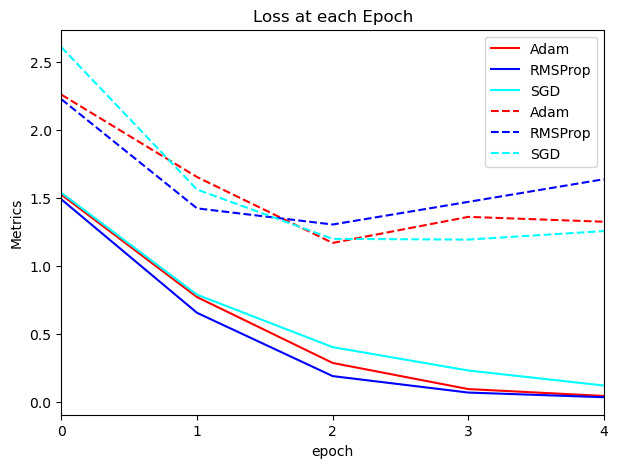

In [169]:
plt.figure(figsize=(7,5))
plt.plot(hist1.history['loss'], color = 'red', label='Adam')
plt.plot(hist2.history['loss'], color = 'blue', label='RMSProp')
plt.plot(hist3.history['loss'], color = 'cyan', label = 'SGD')
plt.plot(hist1.history['val_loss'], linestyle = '--',color = 'red', label='Adam')
plt.plot(hist2.history['val_loss'], linestyle = '--', color = 'blue', label='RMSProp')
plt.plot(hist3.history['val_loss'], linestyle = '--', color = 'cyan', label = 'SGD')
plt.xlim([0,4])
plt.xticks(range(0,5))
plt.xlabel('epoch')
plt.ylabel('Metrics')
plt.title('Loss at each Epoch')
plt.legend()
plt.show()

## Further optimizing RMSProp
- Adding Batch Normalization to the optimized model
- Training using larger batch size and more epochs

In [92]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='valid', activation= tf.nn.relu,
                           kernel_initializer= 'he_normal',input_shape= (224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Conv2D(32,(3,3), padding = 'valid', activation = tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
    ])
model4.compile(optimizer= 'RMSProp', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
hist4 = model4.fit(np.array(X_train), np.array(y_train),batch_size = 64 ,epochs = 10, verbose = 1,
                        validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/10
119/119 [==============================] - 202s 2s/step - loss: 1.5038 - accuracy: 0.5197 - val_loss: 3.5653 - val_accuracy: 0.1605
Epoch 2/10
119/119 [==============================] - 288s 2s/step - loss: 0.6340 - accuracy: 0.8086 - val_loss: 3.2048 - val_accuracy: 0.1394
Epoch 3/10
119/119 [==============================] - 256s 2s/step - loss: 0.1627 - accuracy: 0.9612 - val_loss: 2.2276 - val_accuracy: 0.3627
Epoch 4/10
119/119 [==============================] - 199s 2s/step - loss: 0.0531 - accuracy: 0.9906 - val_loss: 1.5089 - val_accuracy: 0.5839
Epoch 5/10
119/119 [==============================] - 202s 2s/step - loss: 0.0289 - accuracy: 0.9939 - val_loss: 1.6870 - val_accuracy: 0.5887
Epoch 6/10
119/119 [==============================] - 199s 2s/step - loss: 0.0200 - accuracy: 0.9963 - val_loss: 1.6105 - val_accuracy: 0.6331
Epoch 7/10
119/119 [==============================] - 200s 2s/step - loss: 0.0115 - accuracy: 0.9983 - val_loss: 1.7735 - val_accuracy: 0.6241

## Dataframe of model performance
- Comparing models by tabulating the data

In [115]:
history1_df = pd.DataFrame(hist1.history).loc[[0,4],:]
history2_df = pd.DataFrame(hist2.history).loc[[0,4],:]
history3_df = pd.DataFrame(hist3.history).loc[[0,4],:]
history1_df['Model'] = 'Adam'
history2_df['Model'] = 'RMSProp'
history3_df['Model'] = 'SGD'
history_df = pd.concat([history1_df,history2_df,history3_df], ignore_index = True)
history_df

# history_df = pd.concat([pd.DataFrame(hist2.history), 
#                         pd.DataFrame(hist4.history)], 
#                        ignore_index = True)
# history_df

,loss,accuracy,val_loss,val_accuracy,Model
0,1.525479,0.504026,2.260547,0.313094,Adam
1,0.046518,0.992079,1.326922,0.649947,Adam
2,1.491056,0.515644,2.226873,0.317318,RMSProp
3,0.037250,0.991947,1.639357,0.634636,RMSProp
4,1.538894,0.496502,2.609390,0.223865,SGD
5,0.123238,0.979538,1.258221,0.641499,SGD


# Baseline RMSProp vs Optimized
 - comparing original model with optimized version

In [122]:
history2_df = pd.DataFrame(hist2.history).loc[[0,4],:]
history4_df = pd.DataFrame(hist4.history).loc[[0,4,9],:]
history2_df['Epoch'] = [1,5]
history4_df['Epoch'] = [1,5,10]
history_df = pd.concat([history2_df,history4_df], ignore_index = True)
history_df

,loss,accuracy,val_loss,val_accuracy,Epoch
0,1.491056,0.515644,2.226873,0.317318,1
1,0.037250,0.991947,1.639357,0.634636,5
2,1.503831,0.519736,3.565297,0.160507,1
3,0.028923,0.993927,1.686983,0.588701,5
4,0.005197,0.998812,2.030284,0.604013,10


In [97]:
history_df = pd.concat([pd.DataFrame(hist1.history), 
                        pd.DataFrame(hist2.history), 
                        pd.DataFrame(hist3.history)], 
                       ignore_index = True)
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.525479,0.504026,2.260547,0.313094
1,0.773225,0.755116,1.655427,0.499472
2,0.289106,0.915644,1.171184,0.640444
3,0.097098,0.977954,1.362591,0.634636
4,0.046518,0.992079,1.326922,0.649947
5,1.491056,0.515644,2.226873,0.317318
6,0.657542,0.791947,1.425159,0.533791
7,0.192509,0.947195,1.306512,0.635692
8,0.071536,0.983102,1.472837,0.629884
9,0.037250,0.991947,1.639357,0.634636


# Plotting Baseline model vs Optimized model
 - RMSProp further optimized using BatchNormalization.
 - Comparing training accuracy of both models

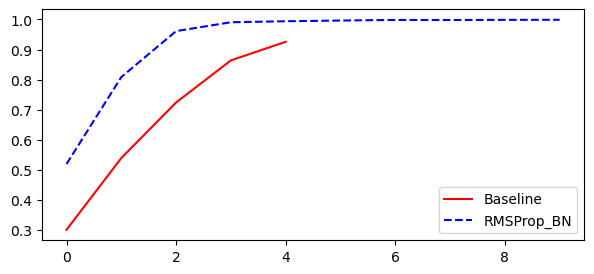

In [148]:
plt.figure(figsize=(7,3))
plt.plot(history.history['accuracy'], color = 'red', label='Baseline')
plt.plot(hist4.history['accuracy'], color = 'blue', linestyle = '--', label= 'RMSProp_BN')
plt.legend()

## Finetuning learning rate in optimized model

In [171]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='valid', activation= tf.nn.relu,
                           kernel_initializer= 'he_normal',input_shape= (224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Conv2D(32,(3,3), padding = 'valid', activation = tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
    ])
optimizer = RMSprop(learning_rate = 0.001)
model5.compile(optimizer= optimizer, loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [142]:
hist5 = model5.fit(np.array(X_train), np.array(y_train),batch_size = 64 ,epochs = 5, verbose = 1,
                        validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/5
119/119 [==============================] - 190s 2s/step - loss: 1.5070 - accuracy: 0.5251 - val_loss: 3.0160 - val_accuracy: 0.1874
Epoch 2/5
119/119 [==============================] - 202s 2s/step - loss: 0.6468 - accuracy: 0.7954 - val_loss: 3.5399 - val_accuracy: 0.1589
Epoch 3/5
119/119 [==============================] - 201s 2s/step - loss: 0.1966 - accuracy: 0.9455 - val_loss: 2.4798 - val_accuracy: 0.3221
Epoch 4/5
119/119 [==============================] - 198s 2s/step - loss: 0.0828 - accuracy: 0.9820 - val_loss: 1.7440 - val_accuracy: 0.4984
Epoch 5/5
119/119 [==============================] - 200s 2s/step - loss: 0.0590 - accuracy: 0.9853 - val_loss: 1.7308 - val_accuracy: 0.5723


### Optimized model with a smaller batch size

In [176]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='valid', activation= tf.nn.relu,
                           kernel_initializer= 'he_normal',input_shape= (224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Conv2D(32,(3,3), padding = 'valid', activation = tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
    ])
model6.compile(optimizer= 'RMSProp', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [178]:
hist6 = model6.fit(np.array(X_train), np.array(y_train),batch_size = 32 ,epochs = 5, verbose = 1,
                        validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/5
237/237 [==============================] - 279s 1s/step - loss: 0.1549 - accuracy: 0.9512 - val_loss: 6.6105 - val_accuracy: 0.5132
Epoch 2/5
237/237 [==============================] - 279s 1s/step - loss: 0.1511 - accuracy: 0.9512 - val_loss: 2.6776 - val_accuracy: 0.5803
Epoch 3/5
237/237 [==============================] - 291s 1s/step - loss: 0.1163 - accuracy: 0.9620 - val_loss: 4.0125 - val_accuracy: 0.5180
Epoch 4/5
237/237 [==============================] - 285s 1s/step - loss: 0.0952 - accuracy: 0.9720 - val_loss: 4.3611 - val_accuracy: 0.5143
Epoch 5/5
237/237 [==============================] - 290s 1s/step - loss: 0.0772 - accuracy: 0.9761 - val_loss: 4.5147 - val_accuracy: 0.5655


In [181]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='valid', activation= tf.nn.relu,
                           kernel_initializer= 'he_normal',input_shape= (224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Conv2D(32,(3,3), padding = 'valid', activation = tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
    ])
model7.compile(optimizer= 'RMSProp', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [182]:
hist7 = model7.fit(np.array(X_train), np.array(y_train),batch_size = 32 ,epochs = 5, verbose = 1,
                        validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/5
237/237 [==============================] - 450s 2s/step - loss: 1.8262 - accuracy: 0.4199 - val_loss: 27.8390 - val_accuracy: 0.1880
Epoch 2/5
237/237 [==============================] - 344s 1s/step - loss: 1.1350 - accuracy: 0.6374 - val_loss: 5.0411 - val_accuracy: 0.2782
Epoch 3/5
237/237 [==============================] - 341s 1s/step - loss: 0.7488 - accuracy: 0.7675 - val_loss: 4.6460 - val_accuracy: 0.5037
Epoch 4/5
237/237 [==============================] - 347s 1s/step - loss: 0.4379 - accuracy: 0.8689 - val_loss: 3.3070 - val_accuracy: 0.5660
Epoch 5/5
237/237 [==============================] - 419s 2s/step - loss: 0.2629 - accuracy: 0.9238 - val_loss: 2.3346 - val_accuracy: 0.5570


## Pretrained model (VGG16)
 - fit a pretrained VGG16 model architecture to explore improvement in performance

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))

for layer in base_model.layers:
    layer.trainable = False

model8 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation= tf.nn.relu),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax),
    ])
model8.compile(optimizer= 'RMSProp', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
hist8 = model8.fit(np.array(X_train), np.array(y_train),batch_size = 32 ,epochs = 5, verbose = 1,
                        validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/5
237/237 [==============================] - 1194s 5s/step - loss: 1.0520 - accuracy: 0.7443 - val_loss: 0.4188 - val_accuracy: 0.8680
Epoch 2/5
237/237 [==============================] - 1150s 5s/step - loss: 0.3070 - accuracy: 0.9043 - val_loss: 0.4896 - val_accuracy: 0.8606
Epoch 3/5
237/237 [==============================] - 1459s 6s/step - loss: 0.1866 - accuracy: 0.9391 - val_loss: 0.4014 - val_accuracy: 0.8870
Epoch 4/5
237/237 [==============================] - 2013s 9s/step - loss: 0.1233 - accuracy: 0.9600 - val_loss: 0.4532 - val_accuracy: 0.8955
Epoch 5/5
237/237 [==============================] - 1838s 8s/step - loss: 0.0839 - accuracy: 0.9745 - val_loss: 0.5472 - val_accuracy: 0.8865


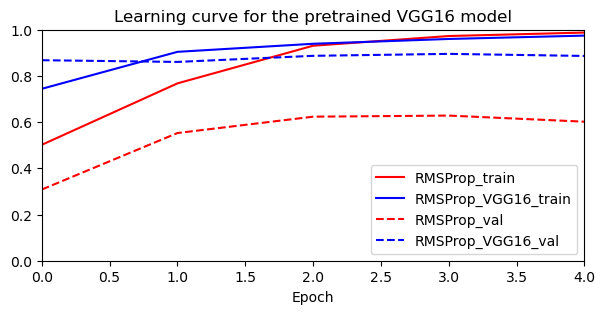

In [33]:
plt.figure(figsize=(7,3))
plt.plot(hist2.history['accuracy'], color = 'red', label='RMSProp_train')
plt.plot(hist8.history['accuracy'], color = 'blue', label= 'RMSProp_VGG16_train')
plt.plot(hist2.history['val_accuracy'], color = 'red', linestyle = '--', label='RMSProp_val')
plt.plot(hist8.history['val_accuracy'], color = 'blue', linestyle = '--', label= 'RMSProp_VGG16_val')
plt.ylim([0,1])
plt.xlim([0,4])
plt.xlabel('Epoch')
plt.title('Learning curve for the pretrained VGG16 model')
plt.legend()